本文档不包含决策树,线性回归

随机森林,AdaBoost 仅仅出现在代码综合项目中

AdaBoost仅仅出现在数据挖掘课中

本文档以机器学习代码为主

复习说明:
1. 分类算法代码解析

- K近邻（KNN）

- 朴素贝叶斯（GaussianNB）

- 逻辑回归（LogisticRegression）

- 随机森林（RandomForestClassifier）

- AdaBoost

- 支持向量机（SVM）

2. 聚类算法代码解析

- K-means

- DBSCAN（自定义实现）

In [47]:
# 基础数据处理和可视化
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # 忽略警告信息

# 数据集加载
from sklearn import datasets

# 分类算法相关
from sklearn.model_selection import train_test_split  # 数据集分割
from sklearn.neighbors import KNeighborsClassifier  # K近邻分类
from sklearn.naive_bayes import GaussianNB  # 朴素贝叶斯分类
from sklearn.metrics import accuracy_score  # 准确率评估
from sklearn.linear_model import LogisticRegression  # 逻辑回归
from sklearn.tree import DecisionTreeClassifier  # 决策树分类
from sklearn.ensemble import RandomForestClassifier  # 随机森林
from sklearn.ensemble import AdaBoostClassifier  # AdaBoost
from sklearn import svm  # 支持向量机
from sklearn.model_selection import cross_val_score  # 交叉验证
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 聚类算法相关
from sklearn.cluster import KMeans  # K-means聚类

# 回归算法相关（辅助理解）
from sklearn.linear_model import LinearRegression  # 线性回归
from sklearn.tree import DecisionTreeRegressor  # 决策树回归
from sklearn.neighbors import KNeighborsRegressor  # K近邻回归

## 1. 数据准备模块

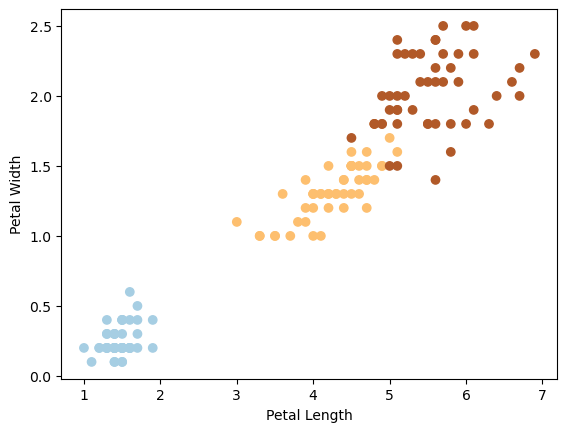

In [ ]:
# 加载Iris数据集
iris = datasets.load_iris()
X = iris.data[:,2:4]  # 只取花瓣长度和宽度两个特征
y = iris.target       # 目标标签

# 数据可视化
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. 分类算法实现

#### (1) K近邻分类器 (KNN)

In [40]:
# KNN模型训练
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 预测与评估
#写法一
print('KNN回归训练集准确率：%.2f%%'%(knn.score(X_train,y_train)*100))
print('KNN回归测试集准确率：%.2f%%'%(knn.score(X_test,y_test)*100))
#写法二
# train_acc = accuracy_score(y_train,y_train_pred)
# test_acc = accuracy_score(y_test,y_test_pred)
# print('训练集准确率:%.2f%%'%(train_acc*100))
# print('测试集准确率:%.2f%%'%(test_acc*100))

KNN回归训练集准确率：95.00%
KNN回归测试集准确率：100.00%


##### 可视化一个k近邻（kNN）分类模型的决策边界，并绘制出数据点的散点图

`*绘制决策边界*:plot_boundary`

In [ ]:
def plot_boundary(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0]-0.2,axis[1]+0.2,int((axis[1]-axis[0])*100)),
        np.linspace(axis[2]-0.2,axis[3]+0.2,int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

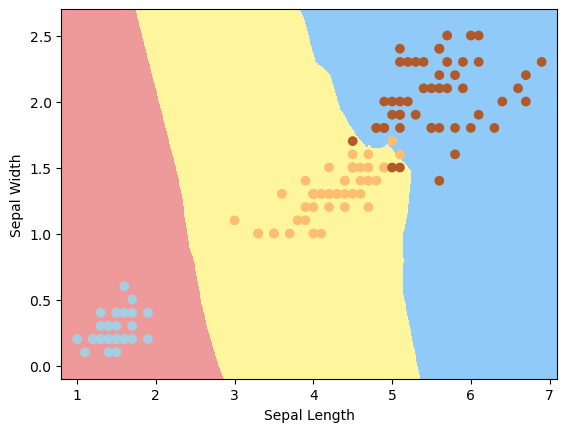

In [42]:
min_1,max_1 = X[:,0].min(),X[:,0].max()
min_2,max_2 = X[:,1].min(),X[:,1].max()
plot_boundary(knn,axis=[min_1,max_1, min_2,max_2])
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

#### (2) 朴素贝叶斯分类器

In [1]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
clf_train_pred = clf.predict(X_train)
clf_test_pred = clf.predict(X_test)

clf_train_acc = accuracy_score(y_train,clf_train_pred)
clf_test_acc = accuracy_score(y_test,clf_test_pred)
print('训练集准确率:%.2f%%'%(clf_train_acc*100))
print('测试集准确率:%.2f%%'%(clf_test_acc*100))

NameError: name 'X_train' is not defined

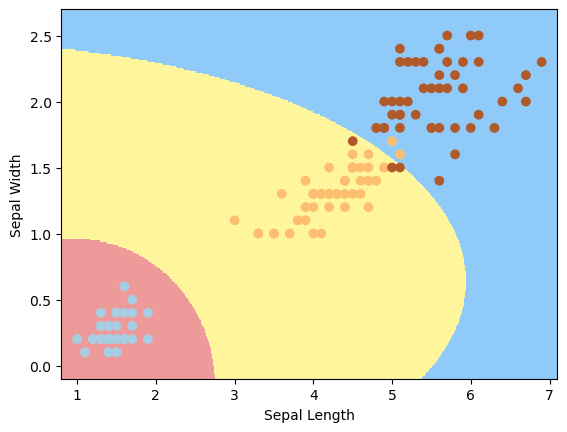

In [36]:
min_1,max_1 = X[:,0].min(),X[:,0].max()
min_2,max_2 = X[:,1].min(),X[:,1].max()
plot_boundary(clf,axis=[min_1,max_1, min_2,max_2])
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

#### (4) 逻辑回归

In [48]:
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
lr = LogisticRegression(random_state=0).fit(X_train_std,y_train)
print('逻辑回归准确率为：',lr.score(X_test_std,y_test))
print('逻辑回归分类报告：',classification_report(y_test,lr.predict(X_test_std),digits=5))

逻辑回归准确率为： 1.0
逻辑回归分类报告：               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        10
           1    1.00000   1.00000   1.00000         9
           2    1.00000   1.00000   1.00000        11

    accuracy                        1.00000        30
   macro avg    1.00000   1.00000   1.00000        30
weighted avg    1.00000   1.00000   1.00000        30



#### (5)支持向量机(SVM)

注意⚠️ svm分为两种:
>第一段使用RBF核（svc），这是一种非线性核函数，能够处理更复杂的决策边界。


>第二段使用的是线性核（svc_L），这是一种线性核函数，适用于线性可分的数据。

In [58]:
#kernel:和函数、gamma:高斯核函数的宽度、decision_function_shape:多分类时的决策函数形状
svc=svm.SVC(C=1.0,kernel='rbf',decision_function_shape='ovr',gamma=0.01)

svc.fit(X_train_std,y_train)
print('逻辑回归正确率为: ',svc.score(X_train_std,y_train))
print('逻辑回归分类报告: \n' ,classification_report(y_test,svc.predict(X_test_std),digits=5))

逻辑回归正确率为:  0.95
逻辑回归分类报告: 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        10
           1    1.00000   1.00000   1.00000         9
           2    1.00000   1.00000   1.00000        11

    accuracy                        1.00000        30
   macro avg    1.00000   1.00000   1.00000        30
weighted avg    1.00000   1.00000   1.00000        30



In [63]:
#线性svm
svc_L = svm.LinearSVC(C=1.0)

svc_L.fit(X_train_std,y_train)
print('逻辑回归正确率为: ',svc_L.score(X_train_std,y_train))
print('逻辑回归分类报告: \n' ,classification_report(y_test,svc_L.predict(X_test_std),digits=5))

逻辑回归正确率为:  0.9416666666666667
逻辑回归分类报告: 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        10
           1    1.00000   0.88889   0.94118         9
           2    0.91667   1.00000   0.95652        11

    accuracy                        0.96667        30
   macro avg    0.97222   0.96296   0.96590        30
weighted avg    0.96944   0.96667   0.96641        30



In [64]:
def plot_boun(model ,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0]-2,axis[1]+2,int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2]-2,axis[3]+2,int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new=np.c_[x0.ravel(),x1.ravel()]
    
    y_predict=model.predict(X_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom = ListedColormap(['#EF9A9A', '#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom)
    

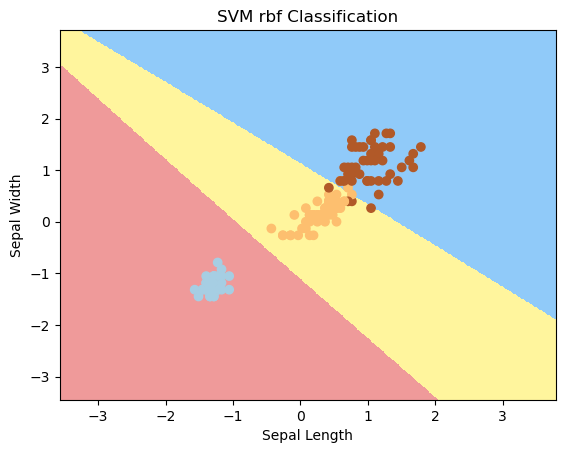

In [65]:
x_combined_std = np.vstack((X_train_std,X_test_std))
y_combine = np.hstack((y_train,y_test))

min_1, max_1 = x_combined_std[:,0].min(),x_combined_std[:,0].max()

min_2, max_2 = x_combined_std[:,1].min(),x_combined_std[:,1].max()

plot_boun(svc,axis=[min_1, max_1, min_2, max_2])
plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combine,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM rbf Classification')
plt.show()

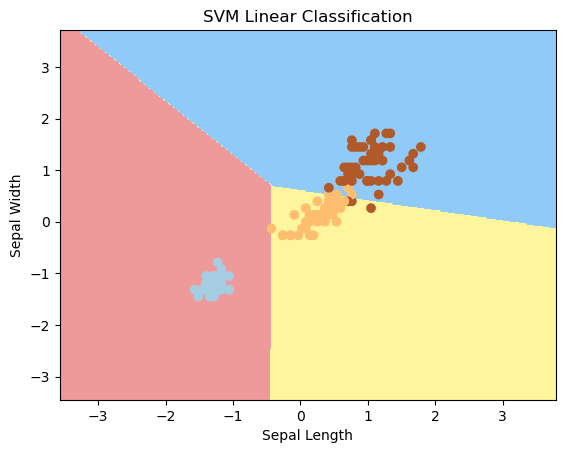

In [66]:
plot_boun(svc_L,axis=[min_1, max_1, min_2, max_2])
plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combine,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Linear Classification')
plt.show()

#### (6)逻辑回归

In [67]:
lr = LogisticRegression(random_state=0).fit(X_train_std,y_train)
print('逻辑回归准确率为：',lr.score(X_test_std,y_test))
print('逻辑回归分类报告：',classification_report(y_test,lr.predict(X_test_std),digits=5))

逻辑回归准确率为： 1.0
逻辑回归分类报告：               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        10
           1    1.00000   1.00000   1.00000         9
           2    1.00000   1.00000   1.00000        11

    accuracy                        1.00000        30
   macro avg    1.00000   1.00000   1.00000        30
weighted avg    1.00000   1.00000   1.00000        30



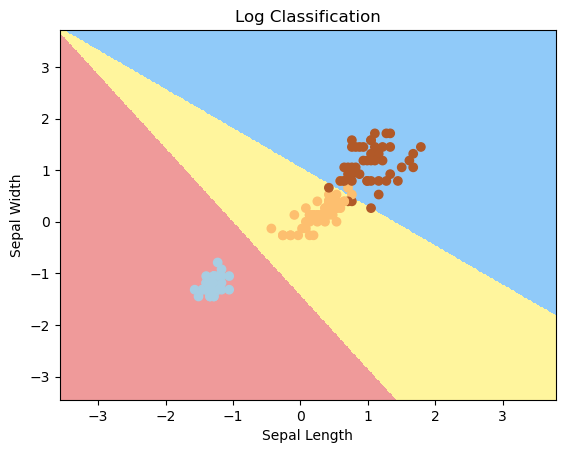

In [68]:
plot_boun(lr,axis=[min_1, max_1, min_2, max_2])
plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combine,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Log Classification')
plt.show()

## 3. 聚类算法实现

#### (1)K-means

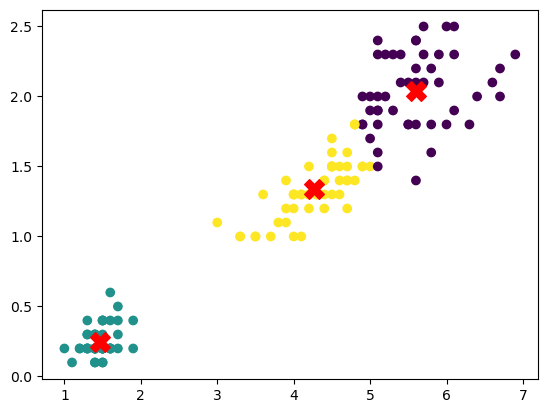

In [13]:
# K-means聚类
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)  # 无监督学习，不使用y标签

# 可视化聚类结果
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='red', s=200, marker='X')
plt.show()

#### (2) DBSCAN(仅出现在数据挖掘课)

In [ ]:
import random
def findNeighbor(j, X, eps):
    N = []
    for p in range(X.shape[0]):
        distance = np.linalg.norm(X[j] - X[p])
        if distance < eps:
            N.append(p)
    return N

def dbscan(X, eps, minPts):
    k = -1
    cluster = [-1 for _ in range(len(X))]
    fill = []
    gamma = [x for x in range(len(X))]
    
    while len(gamma) > 0:
        j = random.choice(gamma)
        gamma.remove(j)
        fill.append(j)
        NeighborPts = findNeighbor(j, X, eps)
        
        if len(NeighborPts) < minPts:
            cluster[j] = -1
        else:
            k += 1
            cluster[j] = k
            for i in NeighborPts:
                if i not in fill:
                    gamma.remove(i)
                    fill.append(i)
                    Ner_NeighborPts = findNeighbor(i, X, eps)
                    if len(Ner_NeighborPts) >= minPts:
                        for n in Ner_NeighborPts:
                            if n not in NeighborPts:
                                NeighborPts.append(n)
                    if cluster[i] == -1:
                        cluster[i] = k
    return cluster


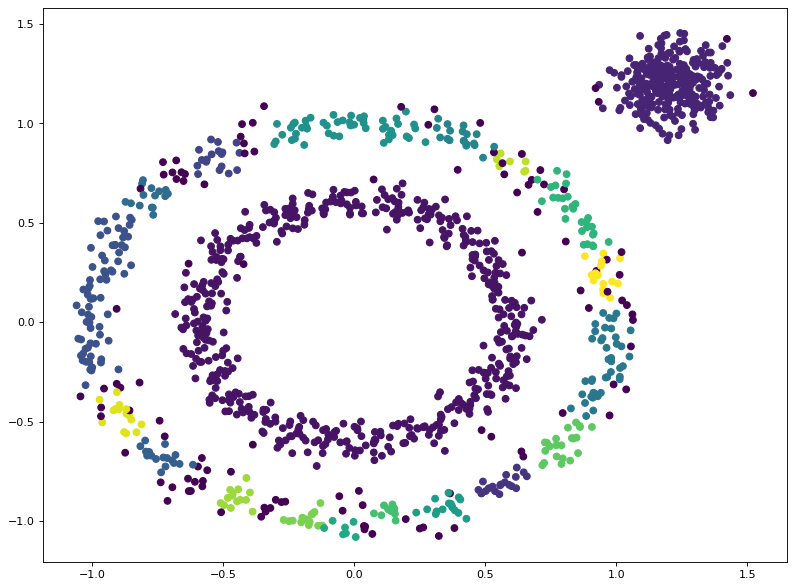

In [ ]:

# 生成数据
X1, y1 = datasets.make_circles(n_samples=1000, factor=0.6, noise=0.05)
X2, y2 = datasets.make_blobs(n_samples=300, n_features=2, centers=[[1.2, 1.2]], cluster_std=[[0.1]], random_state=9)
X = np.concatenate((X1, X2))

# 设置参数
eps = 0.08
minPts = 10

# 运行DBSCAN算法
C = dbscan(X, eps, minPts)

# 绘制结果
plt.figure(figsize=(12, 9), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=C)
plt.show()

## 3.代码综合

#### 1. 五种分类算法实现与评估

In [80]:
# 导入所需包
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#讲实例化后的sc对象作为标准化对象，采用transform方法，分别传入X_train和X_test作为待处理参数
#补全下述代码
sc.fit(X)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

# 加载Iris数据集
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # 花瓣特征
y = iris.target        # 目标标签

# 数据标准化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 数据集分割
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=42
)

# 五种分类算法实例化
clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=100)
clf3 = AdaBoostClassifier(n_estimators=50)
clf4 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1, probability=True)
clf5 = KNeighborsClassifier(n_neighbors=5)

# 交叉验证评估
print("分类算法性能评估:")
for clf, label in zip([clf1, clf2, clf3, clf4, clf5],
                      ['Logistic Regression', 'Random Forest', 'AdaBoost', 'SVM', 'KNN']):
    start = time.time()
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    end = time.time()
    print(f"{label}: 平均准确率={scores.mean():.4f} (±{scores.std():.4f}), "
          f"耗时={end-start:.4f}秒")

分类算法性能评估:
Logistic Regression: 平均准确率=0.9333 (±0.0486), 耗时=0.0092秒
Random Forest: 平均准确率=0.9524 (±0.0426), 耗时=0.2155秒
AdaBoost: 平均准确率=0.9333 (±0.0381), 耗时=0.1399秒
SVM: 平均准确率=0.9429 (±0.0356), 耗时=0.0051秒
KNN: 平均准确率=0.9524 (±0.0426), 耗时=0.0057秒


#### 2. 决策边界可视化函数

In [81]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0]-1,axis[1]+1,int((axis[1]-axis[0])*100)),
        np.linspace(axis[2]-1,axis[3]+1,int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

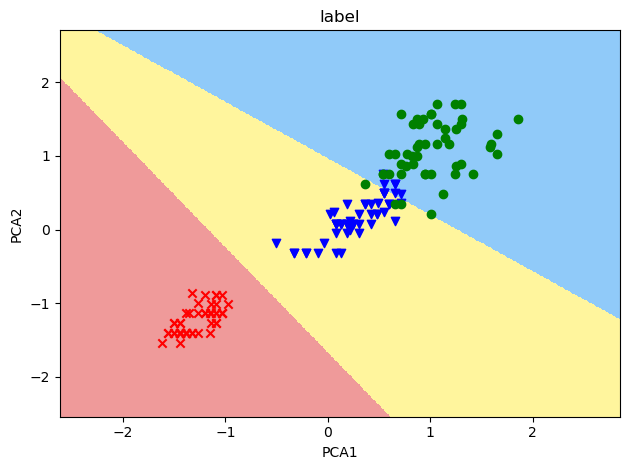

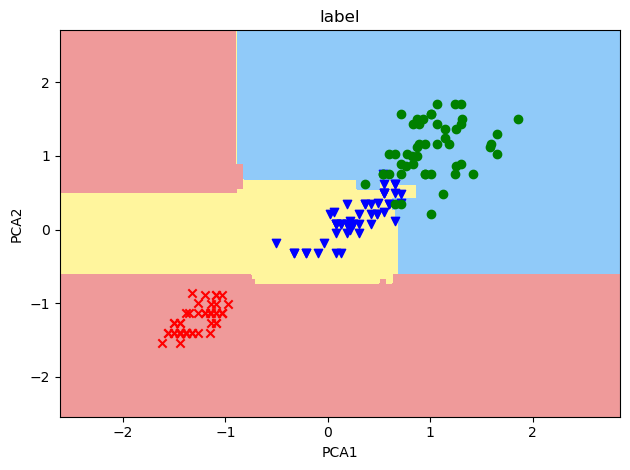

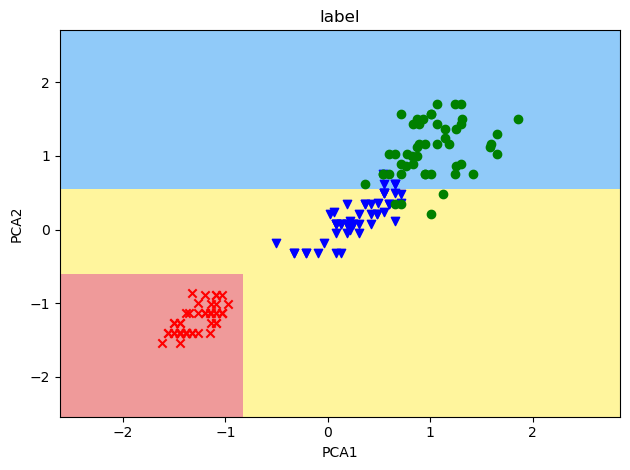

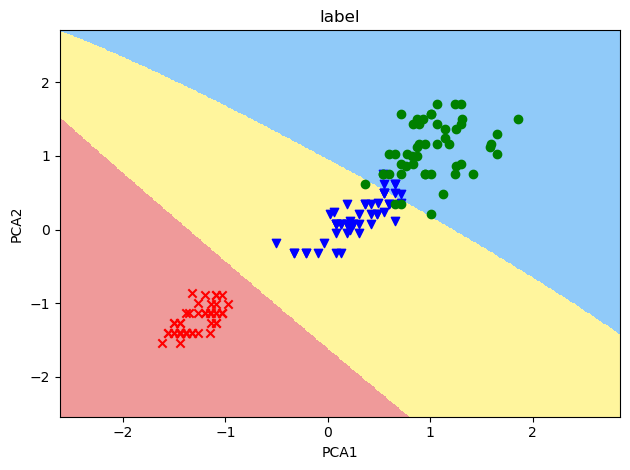

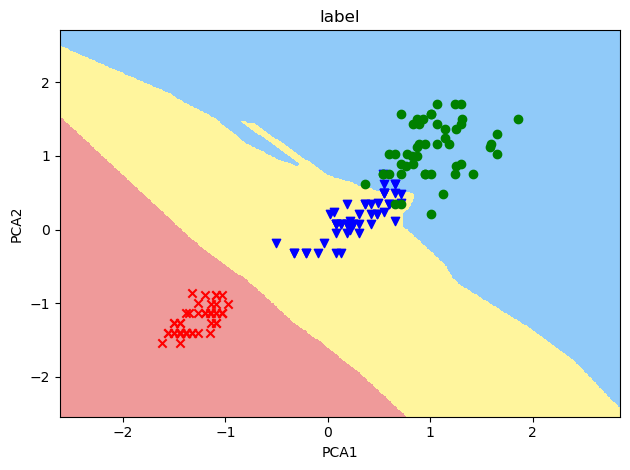

In [85]:
for clf, label in zip([clf1, clf2, clf3, clf4, clf5],
                      ['Logistic Regression', 'Random Forest', 'AdaBoost', 'SVM', 'KNN']):
    x_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    clf.fit(X_train_std, y_train)
    
    min_1, max_1 = x_combined_std[:, 0].min(), x_combined_std[:, 0].max()
    min_2, max_2 = x_combined_std[:, 1].min(), x_combined_std[:, 1].max()
    
    plot_decision_boundary(clf, axis=[min_1, max_1, min_2, max_2])
    #1️⃣分别绘制了三个类别的数据点，使用不同的颜色和标记，并添加了图例
    class_0 = x_combined_std[y_combined == 0]
    class_1 = x_combined_std[y_combined == 1]
    class_2 = x_combined_std[y_combined == 2]
    
    plt.scatter(class_0[:, 0], class_0[:, 1], c='red', marker='x', label='Class 0')
    plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', marker='v', label='Class 1')
    plt.scatter(class_2[:, 0], class_2[:, 1], c='green', marker='o', label='Class 2')
    # #2️⃣一次性绘制了所有数据点，使用了预定义的颜色映射，未添加图例
    # plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combined,cmap=plt.cm.Paired)
    
    plt.xlabel('PCA1')#或'petal length'
    plt.ylabel('PCA2')#或'petal width'
    plt.title('label')
    plt.tight_layout()
    plt.show()